# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Extract the info from IMDB for Movies release in year 2021)

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

# Finding the right key to scrap the data & Extracting the right information
since this website has no table tag, and encapsulate the content inside the DIV tag
then lets search the root from the DIV tag that encapsulate the contents

In [57]:
import requests
from bs4 import BeautifulSoup

web_Address = "https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31"
web_content = requests.get(web_Address).text
web_content_soup = BeautifulSoup(web_content, "html.parser")
div_contents = web_content_soup.find('div', attrs={'class': 'lister-list'})

# After we put the right key, then loop the soup to get the detail of the movies
store the the detail into list variable called movie_list{}

In [58]:
movie_list = []

for div_lister_item_content in div_contents.find_all('div', attrs={'class': 'lister-item-content'}):
    
    title_header = div_lister_item_content.find('h3')
    title_tag = title_header.find('a')
    title = title_tag.text
    
    #Find Rating Bar
    div_rating_bar = div_lister_item_content.find('div', attrs={'class': 'ratings-bar'})
    if div_rating_bar is None:
        rating = 0
    elif div_rating_bar is not None:
        rating_tag = div_rating_bar.find('div', attrs={'class': 'inline-block ratings-imdb-rating'})
        rating = rating_tag.text.strip()
        
        #Find Metascore --> Metasocre inside the rating bar DIV
        div_metascore = div_rating_bar.find('div', attrs={'class': 'inline-block ratings-metascore'})
        if div_metascore is None:
            metascore = 0
        elif div_metascore is not None:
            metascore = div_metascore.find('span').text.strip()
       
    #Find Vote
    vote_paragraph = div_lister_item_content.find('p', attrs={'sort-num_votes-visible'})
    if vote_paragraph is None:
        vote = 0
    else:
        vote_paragraph_span = vote_paragraph.find_all('span')[1].text.replace(",", "")
        vote = vote_paragraph_span

    
    movie_list.append((title, rating, metascore, vote))

# Creating data frame & Data wrangling

In [59]:
import pandas as pd
df_movie_list = pd.DataFrame(movie_list, columns = ('movie_title','movie_rating','metascore', 'vote'))
df_movie_list['movie_title'] = df_movie_list['movie_title'].astype('category')
df_movie_list['movie_rating'] = df_movie_list['movie_rating'].astype('float64')
df_movie_list['metascore'] = df_movie_list['metascore'].astype('int64')
df_movie_list['vote'] = df_movie_list['vote'].astype('int64')

# Arrange the appropriate data type from each field in the Data Frame

In [60]:
df_movie_list['movie_title'] = df_movie_list['movie_title'].astype('category')
df_movie_list['movie_rating'] = df_movie_list['movie_rating'].astype('float64')
df_movie_list['metascore'] = df_movie_list['metascore'].astype('int64')
df_movie_list['vote'] = df_movie_list['vote'].astype('int64')
df_movie_list.dtypes

movie_title     category
movie_rating     float64
metascore          int64
vote               int64
dtype: object

# 7 Populer movies in 2021 based on movie rating

<AxesSubplot:xlabel='movie_title'>

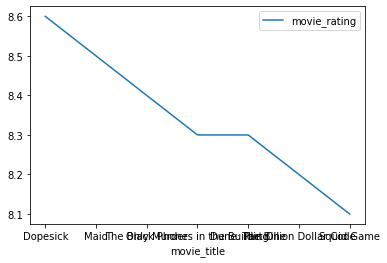

In [61]:
import matplotlib
df_top_seven_movies = df_movie_list.sort_values(by='movie_rating', ascending=False).head(7)
df_top_seven_movies = df_top_seven_movies.drop(['metascore', 'vote'], axis=1)
df_top_seven_movies = df_top_seven_movies.set_index('movie_title')
df_top_seven_movies.plot()

# Finishing This Notebook with Your Analysis and Conclusion

the top seven movies based on rating has rating score 8.1 and 8.6 on their rating

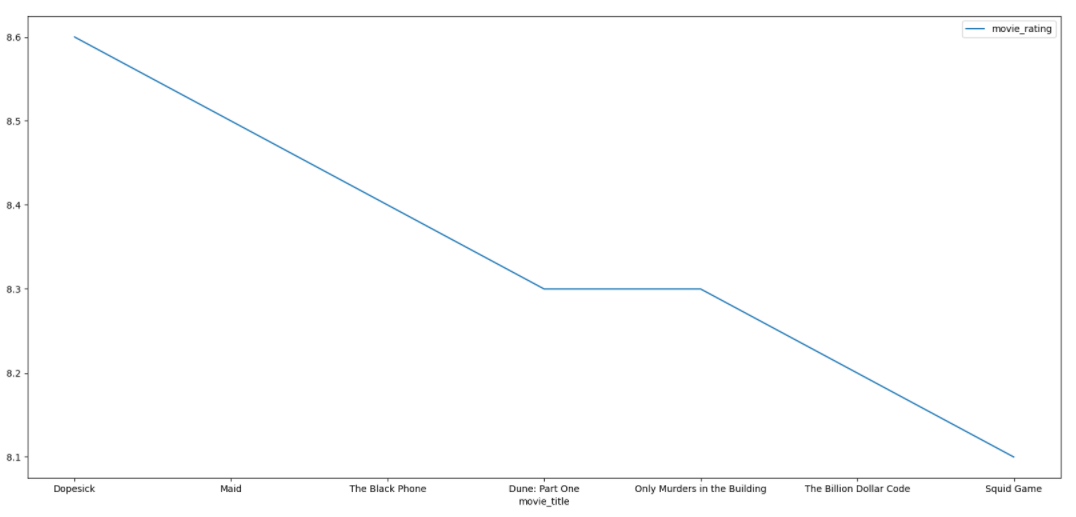

Plot by flask from app.py VS code above